**Проект: Обучение с учителем: качество модели**


Шаг 1. Загрузка данных
- /datasets/market_file.csv
- /datasets/market_money.csv
- /datasets/market_time.csv
- /datasets/money.csv

Шаг 2. Предобработка данных
Проведите необходимую предобработку данных.

Шаг 3. Исследовательский анализ данных
- Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

Шаг 4. Объединение таблиц
В итоговой таблице сделайте отдельный столбец для каждого периода.

Шаг 5. Корреляционный анализ
Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.

Шаг 6. Использование пайплайнов
- Примените все изученные модели. Для этого используйте пайплайны.
- Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику.

Шаг 7. Анализ важности признаков

Шаг 8. Сегментация покупателей
- Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
- Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
- Проведите графическое и аналитическое исследование группы покупателей.

Шаг 9. Общий вывод


**Вывожу необходимые библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install phik -q
import phik
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, f1_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

!pip install shap
import shap

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Загрузка данных

In [2]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [3]:
market_money = pd.read_csv('/datasets/market_money.csv')
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [4]:
market_time = pd.read_csv('/datasets/market_time.csv')
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [5]:
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


## Предобработка данных

In [6]:
print(market_file.info(), '\n')
print(market_file.nunique(), '\n')
print(market_file.isna().sum(), '\n')
print(f'Rоличество дубликатов -', market_file.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [7]:
print(market_money.info(), '\n')
print(market_money.nunique(), '\n')
print(market_money.isna().sum(), '\n')
print(f'Rоличество дубликатов -', market_money.duplicated().sum())
print(market_money['Период'].value_counts())
print(market_money['id'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None 

id         1300
Период        3
Выручка    2776
dtype: int64 

id         0
Период     0
Выручка    0
dtype: int64 

Rоличество дубликатов - 0
текущий_месяц          1300
препредыдущий_месяц    1300
предыдущий_месяц       1300
Name: Период, dtype: int64
2600


In [8]:
market_file['Тип сервиса'].unique()
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

In [9]:
print(market_time.info(), '\n')
print(market_time.nunique(), '\n')
print(market_time.isna().sum(), '\n')
print(f'Количество дубликатов -', market_time.duplicated().sum())
print(market_time['Период'].value_counts())
print(market_time['id'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None 

id        1300
Период       2
минут       20
dtype: int64 

id        0
Период    0
минут     0
dtype: int64 

Количество дубликатов - 0
текущий_месяц       1300
предыдцщий_месяц    1300
Name: Период, dtype: int64
1300


In [10]:
print(money.info(), '\n')
print(money.nunique(), '\n')
print(money.isna().sum(), '\n')
print(f'Количество дубликатов -', money.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None 

id         1300
Прибыль     400
dtype: int64 

id         0
Прибыль    0
dtype: int64 

Количество дубликатов - 0


**Вывод**

Датасеты проверил. 

пропущенных значений и дубликатов нет. Но был одно похожее значение, заменил.

С данными все впорядке.


## Исследовательский анализ данных

In [11]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [12]:
print(f'_Покупательская автивность_', '\n', market_file['Покупательская активность'].value_counts(), '\n')
print(f'_Тип сервиса_', '\n', market_file['Тип сервиса'].value_counts(), '\n')
print(f'_Разрешить сообщать_', '\n', market_file['Разрешить сообщать'].value_counts(), '\n')
print(f'_Популярная_категория_', '\n', market_file['Популярная_категория'].value_counts())

_Покупательская автивность_ 
 Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64 

_Тип сервиса_ 
 стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64 

_Разрешить сообщать_ 
 да     962
нет    338
Name: Разрешить сообщать, dtype: int64 

_Популярная_категория_ 
 Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64


In [13]:
market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


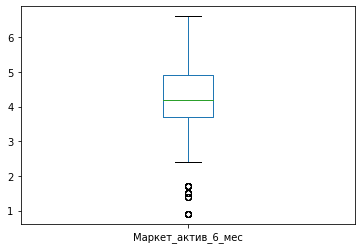

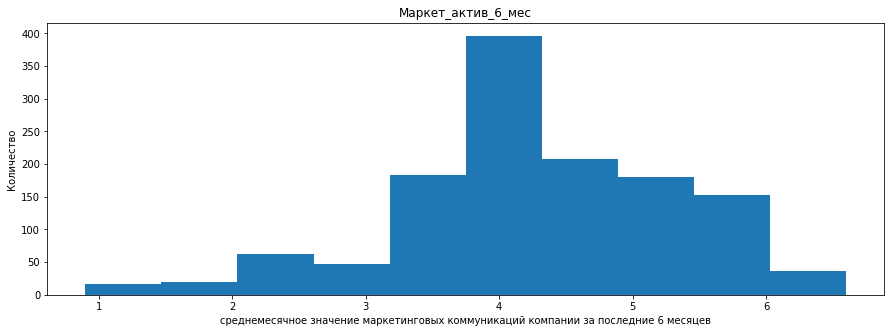

In [14]:
market_file['Маркет_актив_6_мес'].plot.box()
plt.show()
market_file['Маркет_актив_6_мес'].plot(kind='hist', figsize=(15, 5))
plt.title('Маркет_актив_6_мес')
plt.xlabel('среднемесячное значение маркетинговых коммуникаций компании за последние 6 месяцев')
plt.ylabel('Количество')
plt.show()

Тут имеем небольшие выбросы, но они так же важны. потому что в любом случае это маркетинговые активности, которые не можем не учитывать в будущем

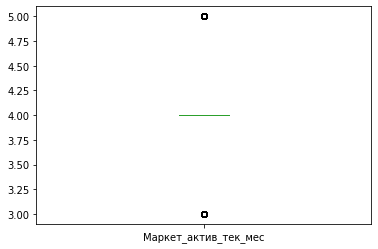

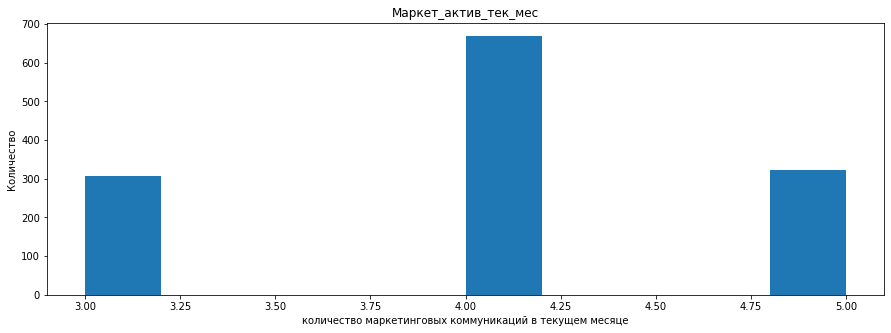

In [15]:
market_file['Маркет_актив_тек_мес'].plot.box()
plt.show()
market_file['Маркет_актив_тек_мес'].plot(kind='hist', figsize=(15, 5))
plt.title('Маркет_актив_тек_мес')
plt.xlabel('количество маркетинговых коммуникаций в текущем месяце')
plt.ylabel('Количество')
plt.show()

тут такая же история как и за 6 месяцев

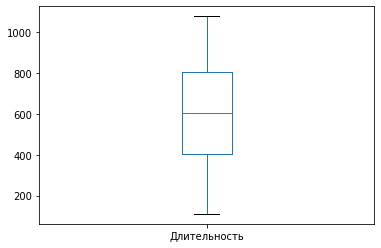

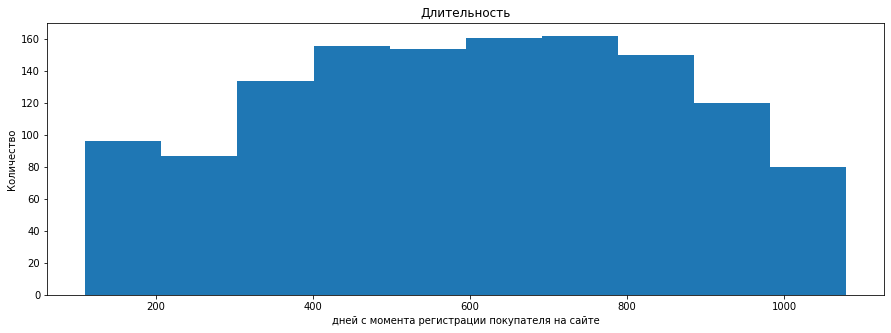

In [16]:
market_file['Длительность'].plot.box()
plt.show()
market_file['Длительность'].plot(kind='hist', figsize=(15, 5))
plt.title('Длительность')
plt.xlabel('дней с момента регистрации покупателя на сайте')
plt.ylabel('Количество')
plt.show()

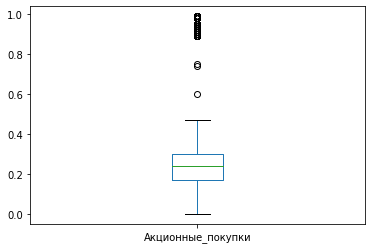

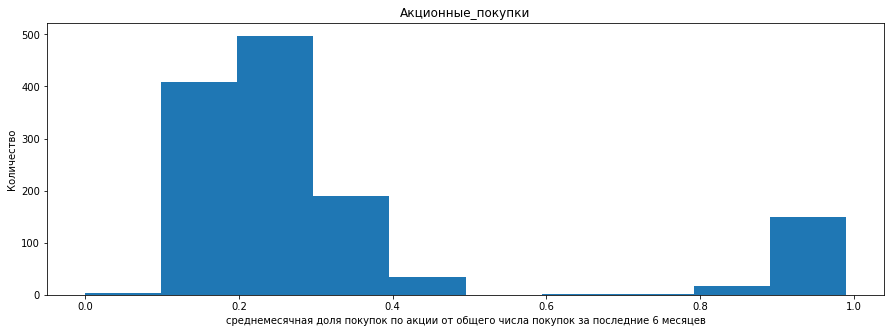

In [17]:
market_file['Акционные_покупки'].plot.box()
plt.show()
market_file['Акционные_покупки'].plot(kind='hist', figsize=(15, 5))
plt.title('Акционные_покупки')
plt.xlabel('среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев')
plt.ylabel('Количество')
plt.show()

In [18]:
market_file['Акционные_покупки'].value_counts().sort_index(ascending=False).head(12)

0.99    30
0.98    17
0.95    24
0.94    43
0.93    19
0.91     5
0.90    11
0.89    16
0.75     1
0.74     1
0.60     1
0.47     1
Name: Акционные_покупки, dtype: int64

Имеются выбросы, но они не малые и вполне адекватные. Поэтому не будем трогать эти выбросы, оставим.

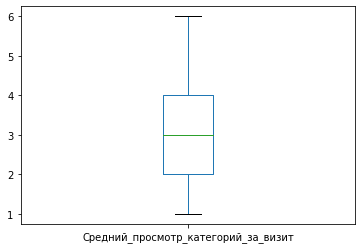

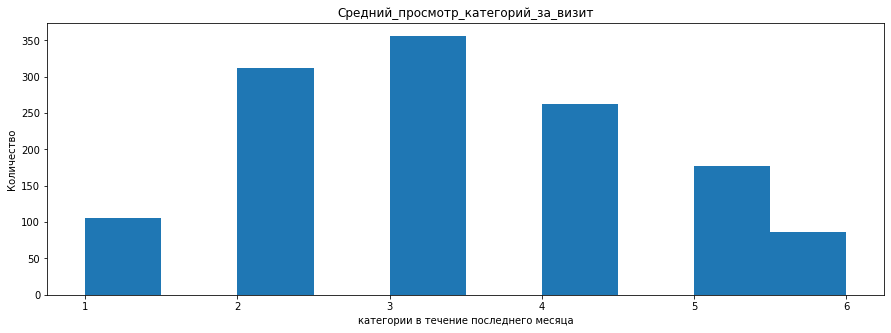

In [19]:
market_file['Средний_просмотр_категорий_за_визит'].plot.box()
plt.show()
market_file['Средний_просмотр_категорий_за_визит'].plot(kind='hist', figsize=(15, 5))
plt.title('Средний_просмотр_категорий_за_визит')
plt.xlabel('категории в течение последнего месяца')
plt.ylabel('Количество')
plt.show()

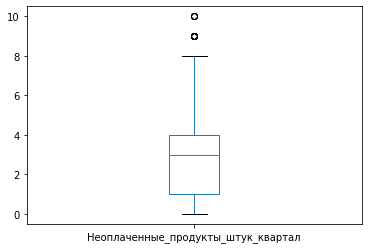

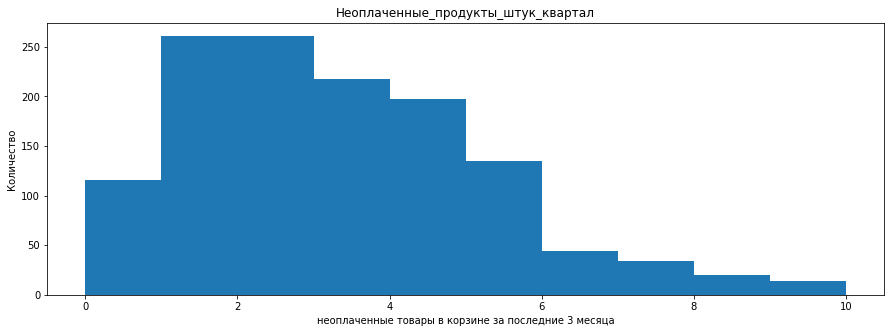

In [20]:
market_file['Неоплаченные_продукты_штук_квартал'].plot.box()
plt.show()
market_file['Неоплаченные_продукты_штук_квартал'].plot(kind='hist', figsize=(15, 5))
plt.title('Неоплаченные_продукты_штук_квартал')
plt.xlabel('неоплаченные товары в корзине за последние 3 месяца')
plt.ylabel('Количество')
plt.show()

Тут имеются пару выбросов, но эти значения вполне адекватны, оставим их.

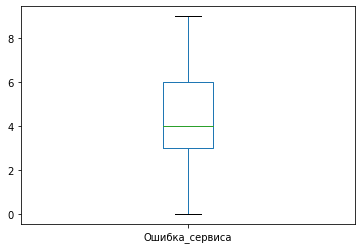

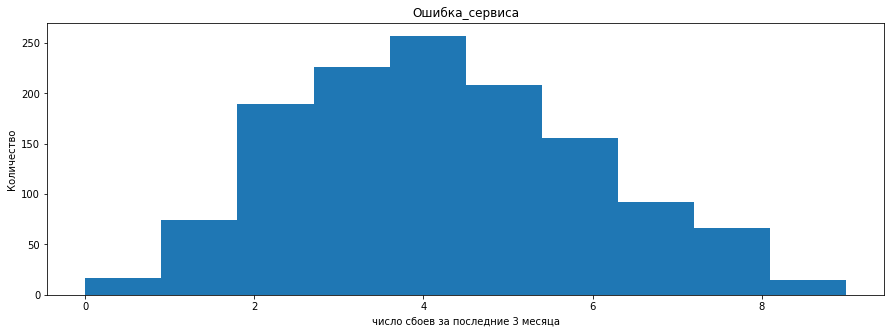

In [21]:
market_file['Ошибка_сервиса'].plot.box()
plt.show()
market_file['Ошибка_сервиса'].plot(kind='hist', figsize=(15, 5))
plt.title('Ошибка_сервиса')
plt.xlabel('число сбоев за последние 3 месяца')
plt.ylabel('Количество')
plt.show()

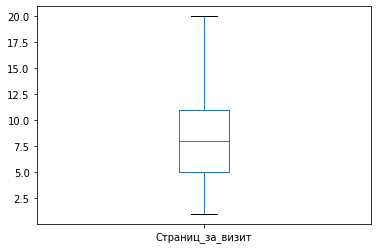

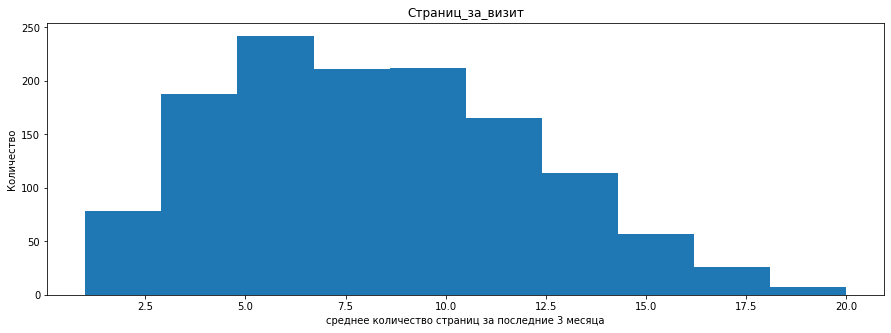

In [22]:
market_file['Страниц_за_визит'].plot.box()
plt.show()
market_file['Страниц_за_визит'].plot(kind='hist', figsize=(15, 5))
plt.title('Страниц_за_визит')
plt.xlabel('среднее количество страниц за последние 3 месяца')
plt.ylabel('Количество')
plt.show()

In [23]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [24]:
print(f'_Период_', '\n', market_money['Период'].value_counts())

_Период_ 
 текущий_месяц          1300
препредыдущий_месяц    1300
предыдущий_месяц       1300
Name: Период, dtype: int64


In [25]:
market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


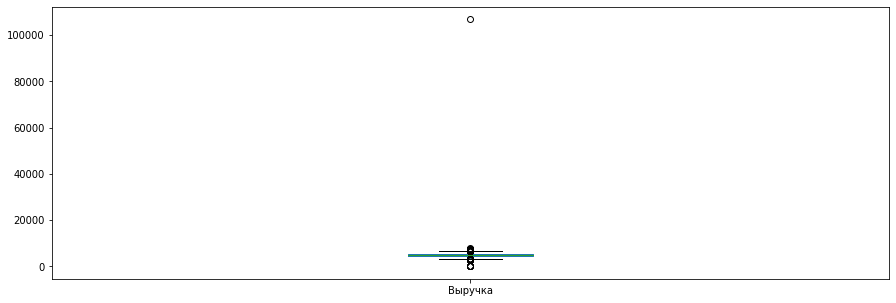

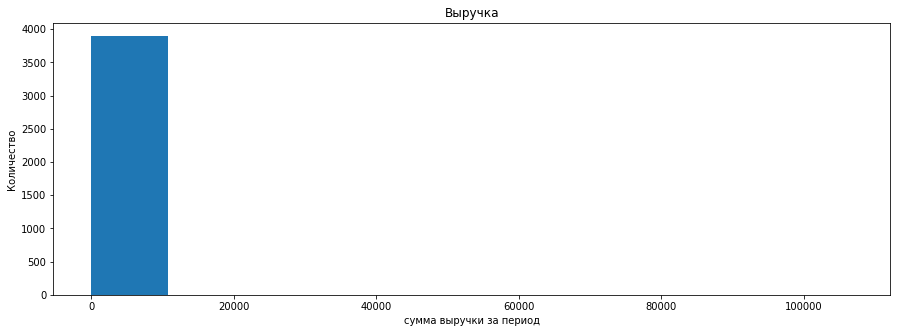

In [26]:
market_money['Выручка'].plot.box(figsize=(15, 5))
plt.show()
market_money['Выручка'].plot(kind='hist', figsize=(15, 5))
plt.title('Выручка')
plt.xlabel('сумма выручки за период')
plt.ylabel('Количество')
plt.show()

In [27]:
market_money['Выручка'].value_counts().sort_index(ascending=False)

106862.2    1
7799.4      1
7605.3      1
7557.0      1
7547.8      1
           ..
2952.2      1
2909.0      1
2890.0      1
2758.7      1
0.0         6
Name: Выручка, Length: 2776, dtype: int64

In [28]:
market_money[market_money['Выручка'] > 8000]

,id,Период,Выручка
98,215380,текущий_месяц,106862.2


In [29]:
display(market_file.loc[market_file['id'] == 215380])
display(market_time.loc[market_time['id'] == 215380])
display(money.loc[money['id'] == 215380])

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


,id,Период,минут
64,215380,предыдцщий_месяц,12
65,215380,текущий_месяц,14


,id,Прибыль
32,215380,3.88


По итогу исследования, определил одного покупателя, у которого значительно больше выручка. По его данным все впорядке, значит это реальные данные, и, просто человек больше всех тратит денег, возможно он миллионер, и, однозначно целевой клиент. 

In [30]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [31]:
print(f'_Период_', '\n', market_time['Период'].value_counts())

_Период_ 
 текущий_месяц       1300
предыдцщий_месяц    1300
Name: Период, dtype: int64


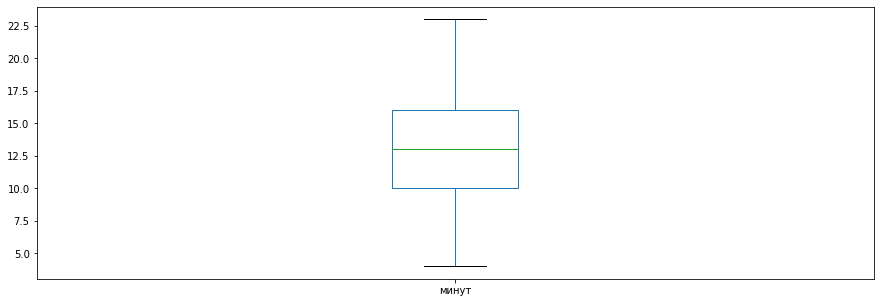

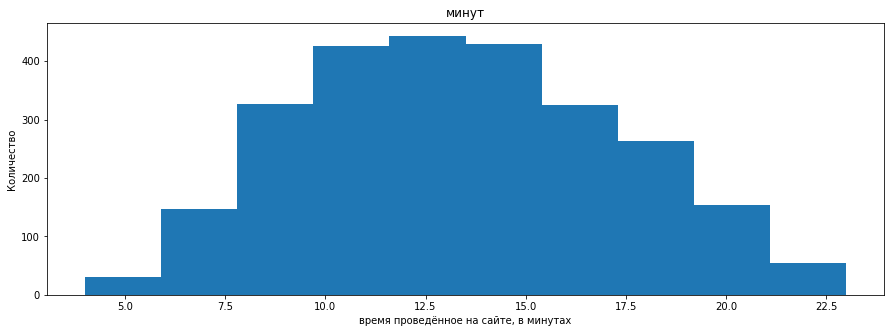

In [32]:
market_time['минут'].plot.box(figsize=(15, 5))
plt.show()
market_time['минут'].plot(kind='hist', figsize=(15, 5))
plt.title('минут')
plt.xlabel('время проведённое на сайте, в минутах')
plt.ylabel('Количество')
plt.show()

In [33]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


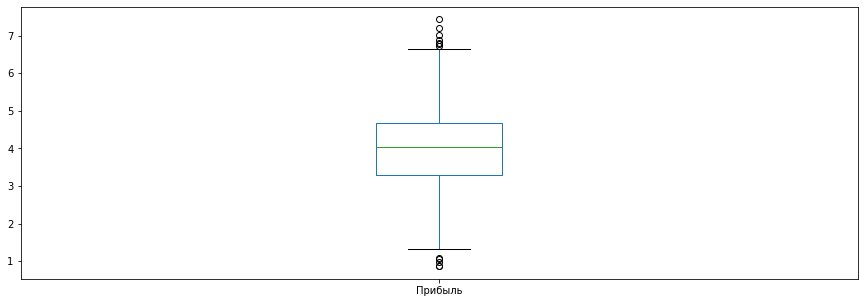

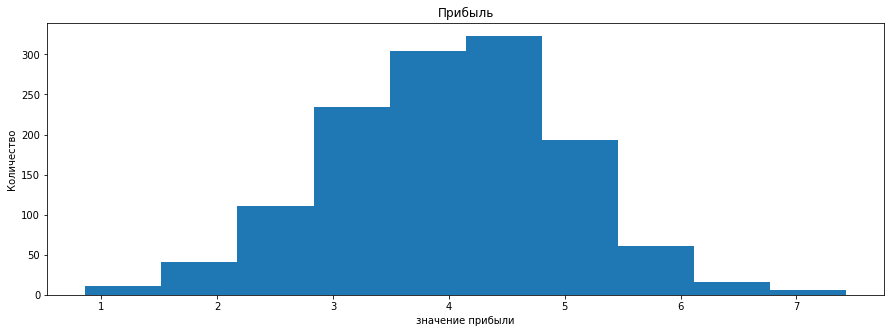

In [34]:
money['Прибыль'].plot.box(figsize=(15, 5))
plt.show()
money['Прибыль'].plot(kind='hist', figsize=(15, 5))
plt.title('Прибыль')
plt.xlabel('значение прибыли')
plt.ylabel('Количество')
plt.show()

Люди, которые приносят мало прибыли тоже важны, потому что их можно раскачать, и они начнут приносить ее.

In [35]:
active_id_first_month = market_money.loc[(market_money['Период'] == 'препредыдущий_месяц') & (market_money['Выручка'] > 0), 'id']
active_id_second_month = market_money.loc[(market_money['Период'] == 'предыдущий_месяц') & (market_money['Выручка'] > 0), 'id']
active_id_third_month = market_money.loc[(market_money['Период'] == 'текущий_месяц') & (market_money['Выручка'] > 0), 'id']
                                         
                                         
active_id = active_id_first_month[active_id_first_month.isin(active_id_second_month) & active_id_first_month.isin(active_id_third_month)]
print(active_id.head())
active_id.shape

3     215349
6     215350
11    215351
13    215352
16    215353
Name: id, dtype: int64


(1297,)

In [36]:
market_file_active = market_file[market_file['id'].isin(active_id)]
market_file_active.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


In [37]:
market_money_active = market_money[market_money['id'].isin(active_id)]
market_money_active.head()

,id,Период,Выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4


In [38]:
market_time_active = market_time[market_time['id'].isin(active_id)]
market_time_active.head()

,id,Период,минут
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13


In [39]:
money_active = money[money['id'].isin(active_id)]
money_active.head()

,id,Прибыль
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95


**Вывод**

Провел исследовательский анализ данных, количественных и качественных. В некоторых данных наблюдаются выбросы.

Так же были отобраны клиенты, которые совершали покупки на протяжении трех последних месяцев, далее, полагаясь на эти данные обновил датафреймы.


## Объединение таблиц

In [40]:
market_money_pivot = market_money_active.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum').reset_index()
market_money_pivot.columns = ['id', 'Выручка_текущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц']

market_time_pivot = market_time_active.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum').reset_index()
market_time_pivot.columns = ['id', 'минут_текущий_месяц', 'минут_предыдущий_месяц']

market_full = market_file_active.merge(market_money_pivot, on='id', how='inner').merge(market_time_pivot, on='id', how='inner')
market_full.head()


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


Соединил три датафрейма с учетом отдельных столбцов для каждого периода для выручки и для минут.

Теперь единая таблица

## Корреляционный анализ

In [41]:
phik_market_full = market_full.phik_matrix(interval_cols=[
    'Маркет_актив_6_мес', 
    'Маркет_актив_тек_мес', 
    'Длительность', 
    'Акционные_покупки', 
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит',
    'Выручка_текущий_месяц',
    'Выручка_предыдущий_месяц',
    'Выручка_препредыдущий_месяц',
    'минут_текущий_месяц',
    'минут_предыдущий_месяц'
])
phik_market_full = phik_market_full.drop(index='id', columns='id')
phik_market_full

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable id is large: 1297. Are you sure this is not an interval variable? Analysis for pairs of variables including id can be slow.
  warnings.warn(


,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
Покупательская активность,1.000000,0.132247,0.000000,0.546370,0.000000,0.101767,0.506991,0.298036,0.539221,0.504845,0.223697,0.748769,0.227280,0.495174,0.000000,0.685078,0.575662
Тип сервиса,0.132247,1.000000,0.286278,0.094182,0.044796,0.401158,0.033339,0.066285,0.186635,0.120842,0.076182,0.100832,0.000000,0.068507,0.000000,0.131084,0.000000
Разрешить сообщать,0.000000,0.286278,1.000000,0.000000,0.051971,0.253956,0.017252,0.071769,0.069322,0.195442,0.020464,0.041128,0.079830,0.000000,0.000000,0.042350,0.000000
Маркет_актив_6_мес,0.546370,0.094182,0.000000,1.000000,0.080454,0.000000,0.278729,0.149812,0.205783,0.286304,0.147270,0.394108,0.149129,0.312243,0.269240,0.363780,0.328385
Маркет_актив_тек_мес,0.000000,0.044796,0.051971,0.080454,1.000000,0.174385,0.000000,0.136175,0.246726,0.143827,0.116310,0.000000,0.054683,0.000000,0.000000,0.106879,0.062485
Длительность,0.101767,0.401158,0.253956,0.000000,0.174385,1.000000,0.000000,0.000000,0.187774,0.191923,0.174467,0.122727,0.125303,0.114058,0.000000,0.024075,0.100502
Акционные_покупки,0.506991,0.033339,0.017252,0.278729,0.000000,0.000000,1.000000,0.122840,0.199417,0.237583,0.000000,0.310741,0.065412,0.225681,0.017746,0.262189,0.250014
Популярная_категория,0.298036,0.066285,0.071769,0.149812,0.136175,0.000000,0.122840,1.000000,0.225622,0.248558,0.000000,0.160623,0.250974,0.045814,0.040420,0.195219,0.089923
Средний_просмотр_категорий_за_визит,0.539221,0.186635,0.069322,0.205783,0.246726,0.187774,0.199417,0.225622,1.000000,0.325688,0.069908,0.262610,0.100332,0.176770,0.000000,0.159393,0.182708
Неоплаченные_продукты_штук_квартал,0.504845,0.120842,0.195442,0.286304,0.143827,0.191923,0.237583,0.248558,0.325688,1.000000,0.033392,0.363879,0.249471,0.261530,0.000000,0.255982,0.232121


Для наглядности создам визуализацию матрицы корреляции

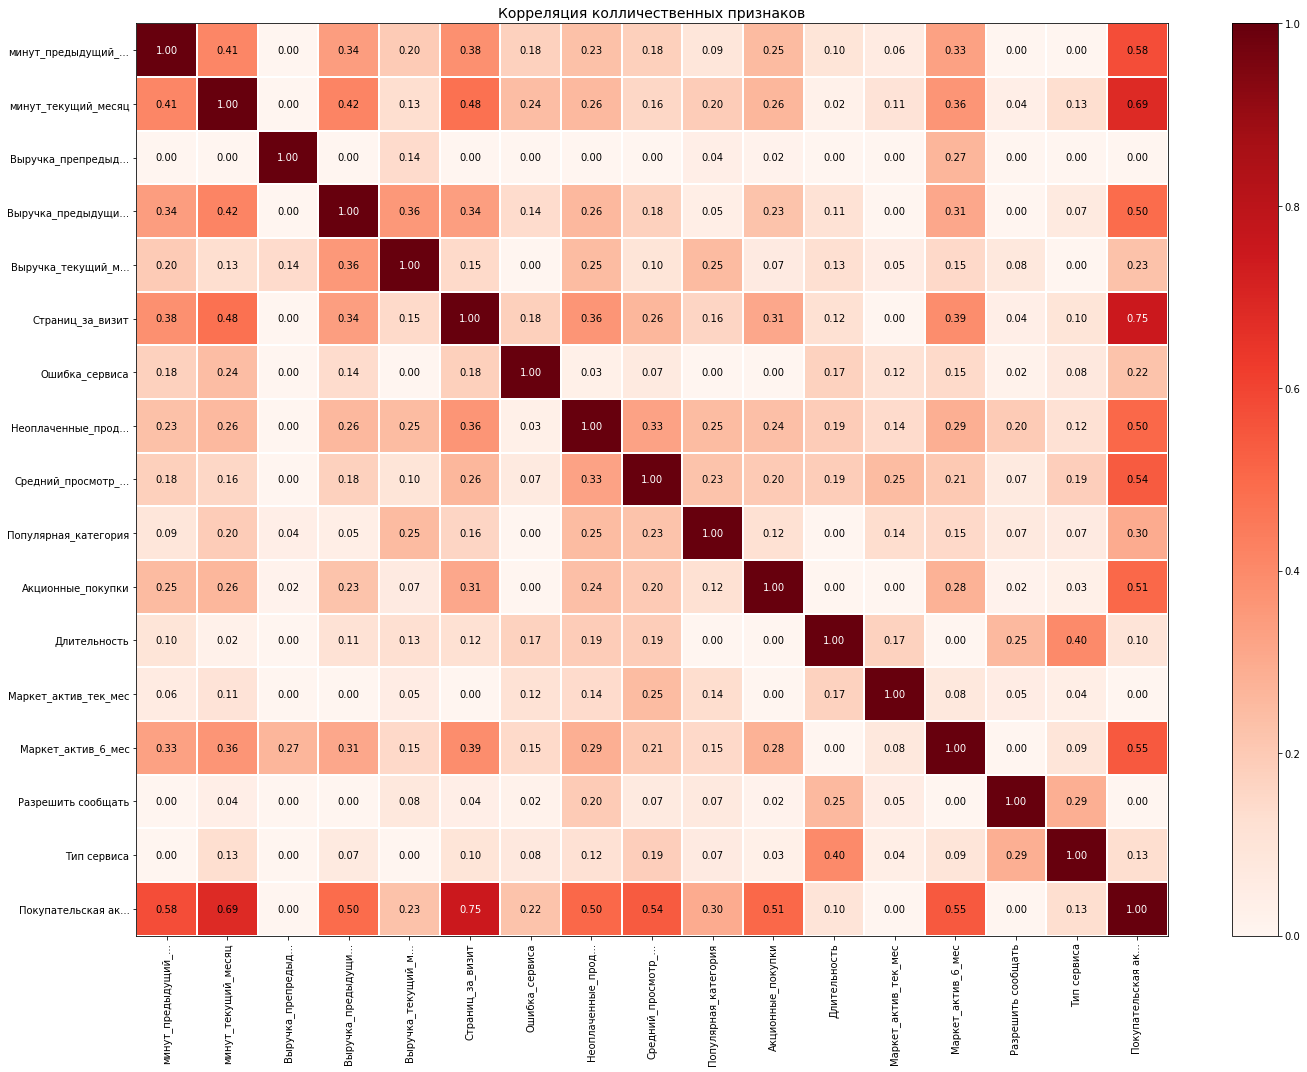

In [42]:
plot_correlation_matrix(
    phik_market_full.values,
    x_labels=phik_market_full.columns,
    y_labels=phik_market_full.index,
    title='Корреляция колличественных признаков',
    vmin=0, vmax=1, color_map='Reds',
    figsize=(20, 15)
) 

**Вывод**

Судя по графику мультиколлинеарность не наблюдается, так как она имеет место быть при значении 0,9.

Выоскую взаимосвязь имеют "Страниц за визит"/"минут за текущий месяц" и "Покупательская способность" 

Среднюю корреляцию к "покупательская активность" имеют следующие показатели: 
- "минут за предыдущий месяц", 
- "выручка за предыдущий месяц", 
- "Неоплаченные_продукты_штук_квартал", 
- "Средний_просмотр_категорий_за_визит", 
- "Акционные покупки", 
- "Маркет_актив_6_мес".

Самую слабую взаимосвязь имеет "выручка в препредыдущий месяц" практически ко всем показателям

## Использование пайплайнов


Выбор метрики пал на roc_auc, потому что она позволяет оценить способность модели различать классы на всех возможных порогах. Это важно в условиях, когда значения вероятностей интерпретируются как ранжирование клиентов по степени активности, а не только как бинарное решение. Также ROC-AUC устойчивее к дисбалансу классов, который может быть характерен для задач поведения пользователей

In [43]:
RANDOM_STATE = 77
TEST_SIZE = 0.25

X = market_full.drop(['id', 'Покупательская активность'], axis=1)
y = market_full['Покупательская активность']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=TEST_SIZE, stratify=y)

print(X_train.shape, X_test.shape)



(972, 16) (325, 16)


In [44]:
ohe_column = ['Популярная_категория']
ord_column = ['Тип сервиса', 'Разрешить сообщать']
num_column = [
    'Маркет_актив_6_мес', 
    'Маркет_актив_тек_мес', 
    'Длительность', 
    'Акционные_покупки', 
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит',
    'Выручка_текущий_месяц',
    'Выручка_предыдущий_месяц',
    'Выручка_препредыдущий_месяц',
    'минут_текущий_месяц',
    'минут_предыдущий_месяц'
]

In [45]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
)
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(
         categories = [
             ['стандарт', 'премиум'],
             ['да', 'нет']
         ],
         handle_unknown='use_encoded_value', unknown_value=np.nan
         )
     ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_column),
        ('ord', ord_pipe, ord_column),
        ('num', StandardScaler(), num_column)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__min_samples_split': range(2, 5),
        'models__min_samples_leaf': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(5, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel':['linear', 'rbf', 'poly'],
        'models__degree': [2, 3, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, random_state=RANDOM_STATE)

randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n', randomized_search.best_estimator_, '\n')
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_, '\n')
print('Лучшие гиперпараметры:', randomized_search.best_params_, '\n')
y_test_pred = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')


Лучшая модель и её параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                

**Вывод**

Лучшая модель - LogisticRegression с параметрами - (C=1, penalty='l1', random_state=77,solver='liblinear')
- Метрика лучшей модели на тренировочной выборке: 0.8971947583947584
- Лучшие гиперпараметры: {'preprocessor__num': StandardScaler(), 'models__C': 1, 'models': LogisticRegression(C=1, penalty='l1', random_state=77, solver='liblinear')} 
- Метрика ROC-AUC на тестовой выборке: 0.9000160487883165



## Анализ важности признаков

In [46]:
best_model = randomized_search.best_estimator_
preprocessor = best_model.named_steps['preprocessor']
model = best_model.named_steps['models']

X_train_transformed = preprocessor.transform(X_train)

ohe_names = preprocessor.named_transformers_['ohe'].named_steps['ohe'].get_feature_names(['Популярная_категория'])
feature_names = list(ohe_names) + ['Тип сервиса', 'Разрешить сообщать'] + num_column

explainer = shap.LinearExplainer(model, X_train_transformed)
shap_values = explainer.shap_values(X_train_transformed)

# График важности
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)


InvalidModelError: An unknown model type was passed: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Из графика видно, что сверху вниз идет важность признаков.

- первые 4 признака наоборот снижают покупательскую активность, то есть много сстраниц просматривают, смотрят много категорий, тратят много времени, но в конечном итоге мало совершают покупок. Они просто листают страницы долгое время.
- те, кто не сидят долгое время, вероятнее что то купят.
- акции стимулируют на покупки. 
- большое количество неоплаченных продуктов повышает вероятность активности.
- признаки (Тип сервиса, товары для детей, разрешить сообщать, ошибка сервиса, выручка за предыдущий месяц) имеют минимальное влияние на модель.

Необходимо делать больше акций, так как они стимулируют вероятность покупательской активности.


## Сегментация покупателей

In [ ]:
full = market_full.merge(money_active, on='id', how='inner')                         
full
#print(len(y_test_pred), len(market_full.loc[X_test.index, 'id']))

In [ ]:
#y_test_pred

activity_level = randomized_search.predict_proba(X)[:, 1]

segments = pd.DataFrame({
    'id': market_full['id'],
    'activity_pred': activity_level
})


segments = segments.merge(money, on='id', how='left')

activity_median = segments['activity_pred'].median()
profit_median = segments['Прибыль'].median()


segments['activity_level'] = ['Высокая' if x >= activity_median else 'Низкая' for x in segments['activity_pred']]
segments['profit_level'] = ['Высокая' if x >= profit_median else 'Низкая' for x in segments['Прибыль']]


def get_segment(row):
    if row['activity_level'] == 'Высокая' and row['profit_level'] == 'Высокая':
        return 'Лояльные'
    elif row['activity_level'] == 'Низкая' and row['profit_level'] == 'Высокая':
        return 'Потенциально ценные'
    elif row['activity_level'] == 'Высокая' and row['profit_level'] == 'Низкая':
        return 'Массовые'
    else:
        return 'Низкоприоритетные'

segments['segment'] = segments.apply(get_segment, axis=1)


target = segments[segments['segment'] == 'Потенциально ценные']
print("Количество покупателей:", len(target))
print("Средняя прибыль:", target['Прибыль'].mean())
print("Средняя вероятность активности:", target['activity_pred'].mean())

Взял сегмент "Потенциально ценные", так как у них есть потенциал.

У них слабая активность, но прибыль, которую они приносят - неплохая.


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=segments,
    x='activity_pred',
    y='Прибыль',
    hue='segment',   # цвет по сегментам
    alpha=0.7,
)

plt.title('Сегментация покупателей по активности и прибыли')
plt.xlabel('Вероятность активности')
plt.ylabel('Прибыль')
plt.legend(title='Сегмент')
plt.grid(True)
plt.show()

Следовательно наиболее интересная группа - потенциально ценные.

- для них можно персонализировать акции и предложения, чтобы таким образом стимулировать количество покупок.
- увеличить кол-во рассылок
- сделать , например, накопительную систему баллов, которые они смогут использовать в будущих заказах.


In [ ]:
target.info()

In [ ]:
target_id = segments[segments['segment'] == 'Потенциально ценные']['id']
non_target_id = segments[segments['segment'] != 'Потенциально ценные']['id']

full['is_target'] = full['id'].isin(target_id)
display(full.head())

In [ ]:
full['is_target'].value_counts()

Беру сегмент и нахожу номера id. Далее сравниваю с общим датасетом, создав доп столбец.

Итого: 
- 329 id - потенциально ценные клиенты
- 968 id - остальные
- 1297 id (строк) всего, общее количсетво совпадает с общим количеством строк в полном датасете, следовательно все верно.


In [ ]:
full.pivot_table(index='Страниц_за_визит', columns='is_target', values='id', aggfunc='count').plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Сравнение: Страниц_за_визит')
plt.xlabel('Страниц_за_визит')
plt.ylabel('Количество')
plt.legend(['Остальные', 'Потенциально ценные'])
plt.grid(True)
plt.show()

Потенциальные клиенты смотрят много страниц. Можно предположить, что они в поисках нужного товара и цены.

In [ ]:
full.pivot_table(index='минут_текущий_месяц', columns='is_target', values='id', aggfunc='count').plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Сравнение: минут_текущий_месяц')
plt.xlabel('минут_текущий_месяц')
plt.ylabel('Количество')
plt.legend(['Остальные', 'Потенциально ценные'])
plt.grid(True)
plt.show()

По минутам можно сказать тоже самое, что потенциальные клиенты достаточно много времени тратят на поиск необходимого товара.

In [ ]:
full.pivot_table(index='Неоплаченные_продукты_штук_квартал', columns='is_target', values='id', aggfunc='count').plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Сравнение: Неоплаченные_продукты_штук_квартал')
plt.xlabel('Неоплаченные_продукты_штук_квартал')
plt.ylabel('Количество')
plt.legend(['Остальные', 'Потенциально ценные'])
plt.grid(True)
plt.show()

Исходя из неоплаченных товаров можно сказать, что впринципе отличий от остальных категорий нет.


In [ ]:
full.pivot_table(index='Ошибка_сервиса', columns='is_target', values='id', aggfunc='count').plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Сравнение: Ошибка_сервиса')
plt.xlabel('Ошибка_сервиса')
plt.ylabel('Количество')
plt.legend(['Остальные', 'Потенциально ценные'])
plt.grid(True)
plt.show()

У потенциальных клиентов достаточно часто встречается ошибка сервиса.

In [ ]:
full.pivot_table(index='Популярная_категория', columns='is_target', values='id', aggfunc='count').plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Сравнение: Популярная_категория')
plt.xlabel('Популярная_категория')
plt.ylabel('Количество')
plt.legend(['Остальные', 'Потенциально ценные'])
plt.grid(True)
plt.show()

Самая популярная категория - мелкая бытовая техника и электроника, домашний текстиль, товары для детей.

In [ ]:
full.pivot_table(index='Тип сервиса', columns='is_target', values='id', aggfunc='count').plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Сравнение: Тип сервиса')
plt.xlabel('Тип сервиса')
plt.ylabel('Количество')
plt.legend(['Остальные', 'Потенциально ценные'])
plt.grid(True)
plt.show()

In [ ]:
pivot = full.pivot_table(index='Тип сервиса', columns='is_target', values='id', aggfunc='count')
pivot['% потенциально ценных'] = 100 * pivot[True] / (pivot[True] + pivot[False])
pivot

**ВЫВОД**

Повышение активности потенциально ценных клиентов может значительно увеличить доход компании без необходимости искать новых клиентов.

Для этого рекомендую сделать:
- снизить ошибки сервиса для потенциальных клиентов
- запоминать оптимальные товары и предлагать похожие, чтобы клиенты меньшесмотрели страниц и времени тратили на поиски (с большим поиском растет вероятность НЕ покупки)
- сделать акцент в виде спец предложений по самым популярным категориям для сегмента (мелкая бытовая техника и электроника, домашний текстиль, товары для детей)
- дать больше возможности стать премиум. 

Итого, чтобы потенциальные клиенты больше покупали, то есть тратили денег, необходимо их стимулировать на покупку, то есть сильнее заинтересовать. Если чаще будут попадаться необходимы товары по их категориям, вероятность активности возрастет.

## Общий вывод пока не писал, хотел бы проверить работу, а затем вывод общий сделаю.


1. Вывел все необходимые библиотеки


2. Вывел все датасеты.


3. Обработал пропуски, дубликаты, уникальные значения. Где было необходимо, почистил.


4. По итогу исследовательского анализа выявил некоторые выбросы в значениях, но они в основном реальные и их оставил. Так же были отобраны клиенты, которые совершали покупки в течении 3х месяцев, то есть были активными.


5. Объединил таблицы уже активных клиентов по id. Разделил периоды для удобного использования и анализа.


6. Корреляционный анализ показал, что мультиколлинеарности нет.<br>
Определил высокие зависимости (страниц за визит и минут за текущий месяц к покупательской способности).


7. Использовал метрику roc_auc для оценки модели, таак как она позволяет оценить способность модели различать классы на всех возможных порогах.<br>
С помощью пайплайна нашел лучшую модель, ее параметры. Определил качество модели на тренировочной и тестовой выборках.
Лучшая модель - LogisticRegression с параметрами - (C=1, penalty='l1', random_state=77,solver='liblinear')<br>
Лучшие гиперпараметры: {'preprocessor__num': StandardScaler(), 'models__C': 1, 'models': LogisticRegression(C=1, penalty='l1', random_state=77, solver='liblinear')}<br>
Метрика лучшей модели на тренировочной выборке: 0.8971947583947584<br>
Метрика ROC-AUC на тестовой выборке: 0.9000160487883165


8. Провел анализ признаков с помощью SHAP, построив график, на котором видно влияние на каждый признак.<br>
Первые 4 признака (то есть самые важные) наоборот снижают покупательскую активность, то есть много сстраниц просматривают, смотрят много категорий, тратят много времени, но в конечном итоге мало совершают покупок. Они просто листают страницы долгое время.


9. Провел сегментацию покупателей. Взял сегмент потенциально ценных. Именно их сервис можно улучшить для большей активности, к тому же они приносят неплохой доход.

Повышение активности потенциально ценных клиентов может значительно увеличить доход компании без необходимости искать новых клиентов.

Для этого рекомендую сделать:

- снизить ошибки сервиса для потенциальных клиентов
- запоминать оптимальные товары и предлагать похожие, чтобы клиенты меньше смотрели страниц и времени тратили на поиски (с большим поиском растет вероятность НЕ покупки)
- сделать акцент в виде спец предложений по самым популярным категориям для сегмента (мелкая бытовая техника и электроника, домашний текстиль, товары для детей)
- дать больше возможности стать премиум.

Итого, чтобы потенциальные клиенты больше покупали, то есть тратили денег, необходимо их стимулировать на покупку, то есть сильнее заинтересовать.<br> Если чаще будут попадаться необходимы товары по их категориям, вероятность активности возрастет.
для них можно персонализировать акции и предложения, чтобы таким образом стимулировать количество покупок.<br>Так же можно увеличить кол-во рассылок. Сделать , например, накопительную систему баллов, которые они смогут использовать в будущих заказах.
